In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [2]:
data_path = "D:\\APS360 Data\\Subset\\" 

# Showing All 30 Classes

In [3]:
classes = os.listdir(data_path)

In [4]:
def get_image(path):
    img = mpimg.imread(path)
    return img

In [5]:
images = []
labels = []

for cls in classes:
    cls_path = data_path + cls
    img_path = cls_path + "\\" + os.listdir(cls_path)[0]
    img = get_image(img_path)
    images.append(img)
    labels.append(cls)

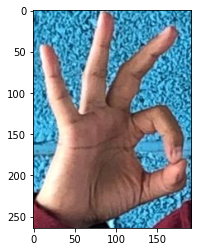

In [6]:
plt.imshow(images[29])

In [7]:
def plot_symbols(images, labels, cols=5):
    """
    Plots a grid of images with their corresponding labels.

    Parameters:
    - images: A list of images (as PIL images or NumPy arrays).
    - labels: A list of labels (strings) for the images.
    - cols: Number of columns in the plot grid.
    """
    assert len(images) == len(labels), "The number of images and labels must match"
    
    # Calculate the number of rows needed
    rows = len(images) // cols + (len(images) % cols > 0)
    
    # Set up the figure size dynamically based on number of images
    plt.figure(figsize=(cols * 2, rows * 2))  # Adjust size as needed
    
    for i, (image, label) in enumerate(zip(images, labels)):
        plt.subplot(rows, cols, i + 1)
        if isinstance(image, np.ndarray):  # If the image is a NumPy array
            plt.imshow(image, cmap='gray' if image.ndim == 2 else None)
        else:  # If the image is a PIL image
            plt.imshow(image)
        plt.title(label)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

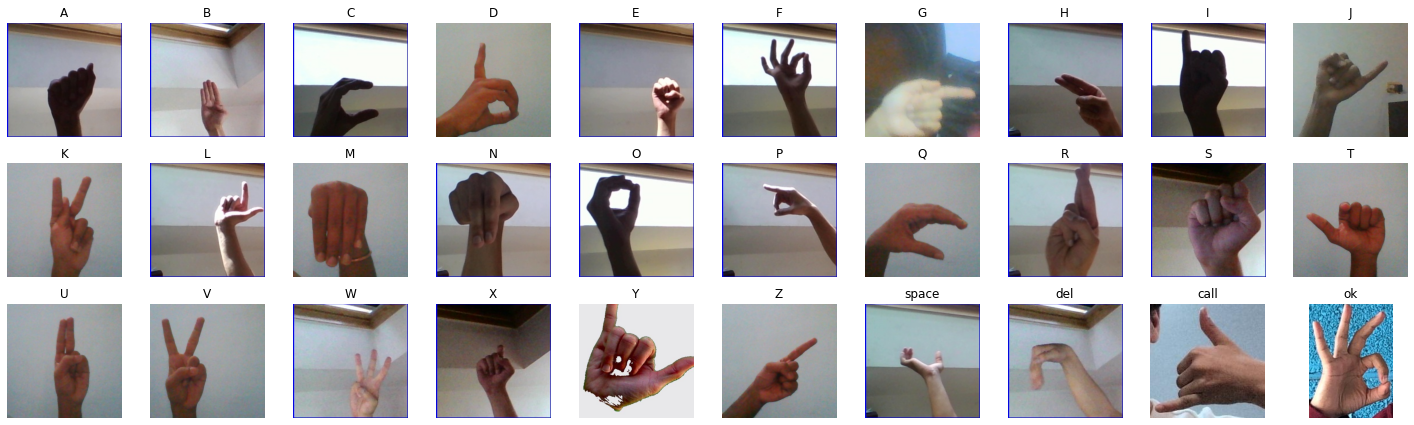

In [8]:
plot_symbols(images,labels,cols=10)

## Cropping HaGRID images

In [9]:
import json
from PIL import Image

In [10]:
hagrid_call = "D:\APS360 Data\Initial_Data\Hagrid_Call"
call_json = "D:\\APS360 Data\\Initial_Data\\ann_train_val\\call.json"

In [11]:
call_data = None
with open(call_json,'r') as file:
    call_data = json.load(file)

In [12]:
sample_call = "D:\\APS360 Data\\Initial_Data\\Hagrid_Call\\0b97ea77-dbfa-4d1e-85a9-784cfacde77a.jpg"

def show_image(path):
    img = mpimg.imread(path)
    plt.imshow(img)
    return img

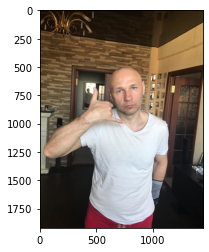

In [13]:
img = show_image(sample_call)

In [14]:
def crop_bounded_image(bbox, path):

    image = Image.open(path)

    for box in bbox:
        x = box[0] * image.width
        y = box[1] * image.height
        width = x + box[2] * image.width
        height = y + box[3] * image.height

        cropped_image = image.crop((x, y, width, height))
        #plt.imshow(cropped_image)
        #plt.show()
        return cropped_image
        #cropped_image.save(homedirectory + symbol + image_id + jpg)

In [15]:
filename = os.path.basename(sample_call)
bbox = call_data[filename.split(".")[0]]['bboxes']

In [16]:
bbox

[[0.28003273, 0.34626857, 0.24008663, 0.18397411]]

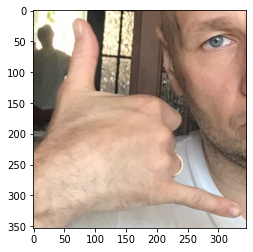

In [17]:
img2 = crop_bounded_image(bbox,sample_call)
plt.imshow(img2)

Text(0.5, 1.0, 'Cropped')

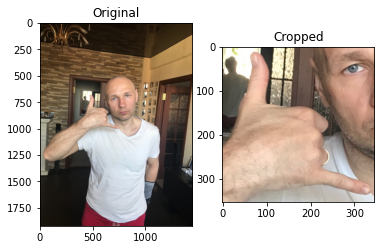

In [18]:
plt.subplot(1, 2, 1)  # (rows, columns, panel number)
plt.imshow(img)
plt.title('Original')

plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.title('Cropped')

## Crop and Pad

In [19]:
import cv2

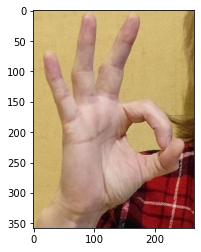

In [20]:
img = show_image(data_path+"ok\\"+os.listdir(data_path+"ok")[104])

In [21]:
def resize_and_pad_image(image, output_size=(256, 256)):
    h, w, _ = image.shape
    pad_width = abs(h-w) // 2
    
    if h > w:
        image = cv2.copyMakeBorder(image, 0, 0, pad_width, pad_width, cv2.BORDER_CONSTANT, value=[0, 0, 0])
    elif h < w:
        image = cv2.copyMakeBorder(image, pad_width, pad_width, 0, 0, cv2.BORDER_CONSTANT, value=[0, 0, 0])
    
    image = cv2.resize(image, output_size)
    return image

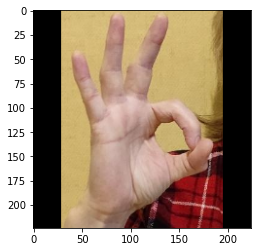

In [22]:
resized_img = resize_and_pad_image(img,(224,224))
plt.imshow(resized_img)

Text(0.5, 1.0, 'Resized and Padded')

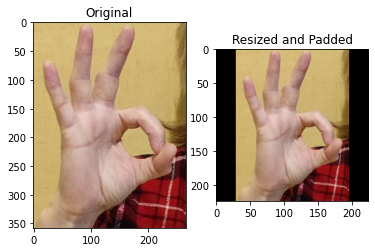

In [23]:
plt.subplot(1, 2, 1)  # (rows, columns, panel number)
plt.imshow(img)
plt.title('Original')

plt.subplot(1, 2, 2)
plt.imshow(resized_img)
plt.title('Resized and Padded')

## Random Adjustments

In [24]:
import scipy.ndimage

In [25]:
def get_image(path):
    img = mpimg.imread(path)
    #plt.imshow(img)
    return img

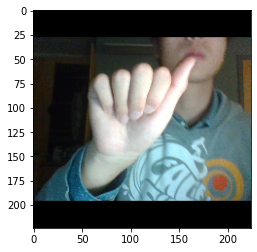

In [26]:
cls = "A"
imgA = get_image(data_path+cls+"\\"+os.listdir(data_path+cls)[104])
imgA = resize_and_pad_image(imgA,(224,224))
plt.imshow(imgA)

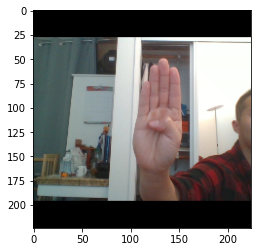

In [27]:
cls = "B"
imgB = get_image(data_path+cls+"\\"+os.listdir(data_path+cls)[102])
imgB = resize_and_pad_image(imgB,(224,224))
plt.imshow(imgB)

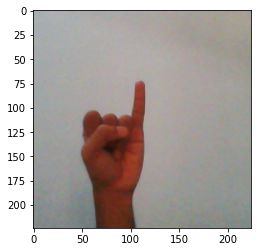

In [36]:
cls = "I"
imgI = get_image(data_path+cls+"\\"+os.listdir(data_path+cls)[104])
imgI = resize_and_pad_image(imgI,(224,224))
plt.imshow(imgI)

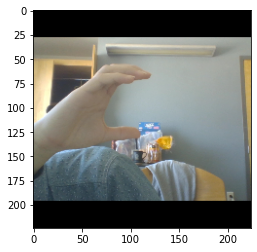

In [43]:
cls = "C"
imgC = get_image(data_path+cls+"\\"+"231.jpg")
imgC = resize_and_pad_image(imgC,(224,224))
plt.imshow(imgC)

(224, 224, 3)


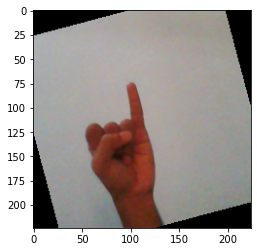

In [44]:
imgI_rotated = scipy.ndimage.rotate(imgI, 15,reshape=False)
print(imgI_rotated.shape)
plt.imshow(imgI_rotated)

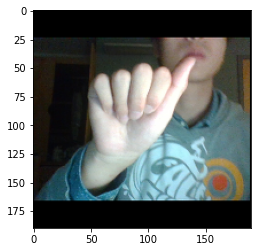

In [45]:
imgA_scaled = scipy.ndimage.zoom(imgA, (0.85, 0.85, 1), order=3)
plt.imshow(imgA_scaled)

In [46]:
def zoom_image_without_changing_dimensions(img, zoom_factor=1.15):
    # Calculate the new size and ensure it's integer
    new_size = np.array(img.shape[0:2]) * zoom_factor
    new_size = new_size.astype(int)
    
    # Resize (zoom) the image
    zoomed_img = scipy.ndimage.zoom(img, (zoom_factor, zoom_factor, 1), order=3)  # order=3 for cubic interpolation
    
    # Calculate the cropping box
    crop_x = (zoomed_img.shape[0] - img.shape[0]) // 2
    crop_y = (zoomed_img.shape[1] - img.shape[1]) // 2
    
    # Crop the image to the original size
    cropped_img = zoomed_img[crop_x:crop_x + img.shape[0], crop_y:crop_y + img.shape[1]]
    
    return cropped_img

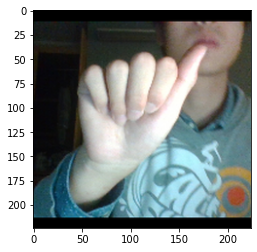

In [47]:
imgA_scaled = zoom_image_without_changing_dimensions(imgA,1.2)
plt.imshow(imgA_scaled)

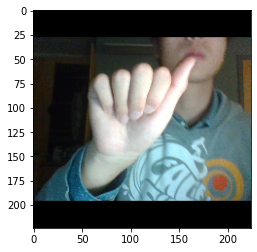

In [48]:
plt.imshow(imgA)

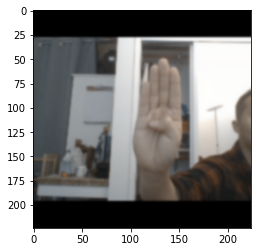

In [50]:
imgB_blurred = scipy.ndimage.gaussian_filter(imgB, sigma=1.0)
plt.imshow(imgB_blurred)

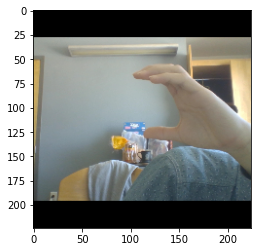

In [52]:
imgC_flipped = cv2.flip(imgC,1)
plt.imshow(imgC_flipped)

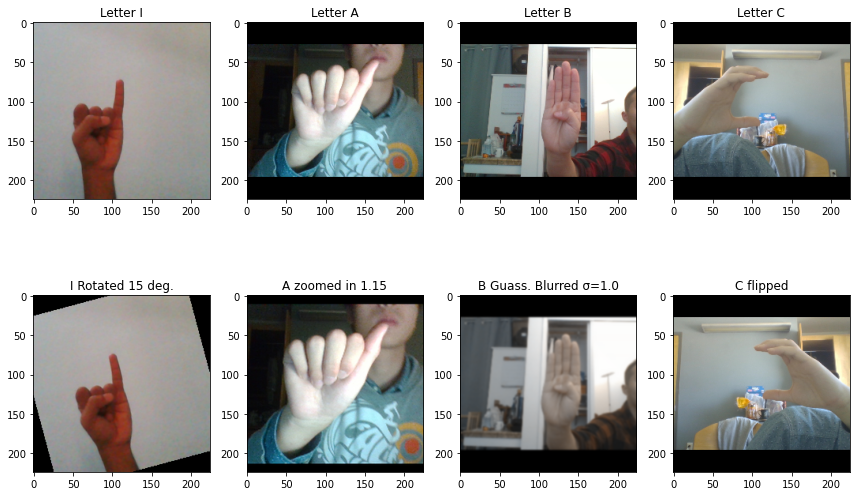

In [55]:
plt.figure(figsize=(12, 8))

# First row of images
plt.subplot(2, 4, 1)  # (rows, columns, panel number)
plt.imshow(imgI)
plt.title('Letter I')

plt.subplot(2, 4, 2)
plt.imshow(imgA)
plt.title('Letter A')

plt.subplot(2, 4, 3)
plt.imshow(imgB)
plt.title('Letter B')

plt.subplot(2,4,4)
plt.imshow(imgC)
plt.title('Letter C')

# Second row of images
plt.subplot(2, 4, 5)
plt.imshow(imgI_rotated)
plt.title('I Rotated 15 deg.')

plt.subplot(2, 4, 6)
plt.imshow(imgA_scaled)
plt.title('A zoomed in 1.15')

plt.subplot(2, 4, 7)
plt.imshow(imgB_blurred)
plt.title('B Guass. Blurred σ=1.0')

plt.subplot(2, 4, 8)
plt.imshow(imgC_flipped)
plt.title("C flipped")

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the figure
plt.show()